Solution to stream power law in 1D.
First import the relavent libraries:
numpy - a library for numerical functions
matplotlib - a library of plotting functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Now we set up the model parameters, the coefficient of erosion, k, and the water flux exponent, m. We also set up the model run time, 10e6 years, the rate of uplift, 1e-4 m/yr, precipiation rate, 1 m/yr.

In [2]:
K      = 5e-5
m      = 0.5
t_end  = 10e6
up0    = 1e-4
alpha  = 1

We will model over a certain system length, for which we need to define a 1D array of x-values, and the equivalent arrayto store the elevation, z. We will solve the equations going up the system from bottom to top. To calculate the slope, difference in elevation, we need an extra point in elevation. Therefore we will define the array for z with an extra element. We set up distance, x, as going from 0 to 100,000 m in 100 increments. The array for elevation, z, is initialised as being equal to zero, and has an extra element.

In [3]:
nx     = 100
x      = np.linspace(0,100e3,nx)
dx     = x[1]-x[0]
z      = np.zeros(nx+1)

Now we want to calculate hte upstream area for each position in space. We assume that the upstream dranaige area, DA, is equal to the distance upstream, x, raised to the power 1.4. Why 1.4? It is empirically observed that length of the main stream in a catchment is proportional to the catchment area raised to the power h, where h is the Hack exponent, and 0.7<h<0.5. This main stream length is related to the longitudinal length of the cathchment as x raised to the power d, where 1<d<1.1. Therefore the longitudinal length (x in our model) is realted to catchemnt area raised to the power p (hackFactor), where p=d/h. Therefore we get 1.4<p<2 for the hackFactor.

As for elevation we make this array of catchment area on element longer by inserting the first value in the first spot of the array, hence lengthening it by one element. Finally we calculate the parameter a = -K (alpha * x^p)^m.

In [4]:
hackFactor = 1.4
DA         = np.power(x,hackFactor)
DA         = np.insert(DA,0,[DA[0]],axis=0)
a          = -K * np.power(alpha*DA,m)

Now we set up the time stepping. The number of time steps is 10,000, and we make a vector of the time, and calculate the size of the timestep. 

In [5]:
nt    = 10000
times = np.linspace(0,t_end,nt)
dt    = times[1]-times[0]

Now that we have time set up we can create an array to store the sediment flux output in time

In [6]:
q  = np.zeros(np.shape(times))

Just before we loop in time, we need to save uplift in a new variable and make a new variable to help us plot.

In [7]:
up    = up0
ui    = 0

Now we loop over time to solve z(new)-z(old)/dt = -K(alpha * x^p)^m * S . We then at each time step calculate the differnece in elevation from the elevation prior to erosion and that after to get a sediment flux, q.

In [8]:
for k in times :
    # update elevation by the uplift
    z[0:nx-1] = z[0:nx-1] + up*dt

    # store previous elevation
    z_old = z
     
    # calculate slope from previous time step
    z[z<1e-6] = 0  # avoid small numbers
    ex_r = np.append(z[1:nx+1],[z[nx]],axis=0) # make an array of the upstream points
    s1 = (z-ex_r)/dx # calculate the slope for every point 
    s1[s1<1e-4] = 0  # avoid small numbers

    # solve
    z = a * s1 * dt + z
    
    # calculate sediment flux
    q[ui] = np.trapz(z_old-z) * dx/dt
    ui = ui + 1

Now we can plot the result

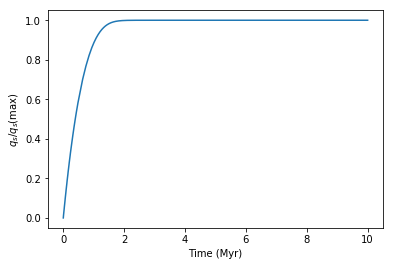

In [9]:
plt.figure(1)
plt.plot(1e-6*times,q/np.max(abs(q)))
plt.xlabel('Time (Myr)')
plt.ylabel('$q_s/q_s$(max)')
plt.savefig('sp-2xup.png',)
plt.show()